In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('new_222_data_train_decorr_imputed.csv')
df_test = pd.read_csv('new_222_data_test_decorr_imputed.csv')
df.sample(3)

,Average Workers_Compensation_Costs_(per $100 of payroll),Debt_Service_as_a_Share_of_Tax_Revenue,Estate_Inheritance_Tax_Levied_Flag,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Cost_of_Living,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,Prev_Yr_Agri_Pct_GDP,Prev_Yr_EduS_Pct_GDP,Prev_Yr_EntS_Pct_GDP,Prev_Yr_FinS_Pct_GDP,Prev_Yr_GoTr_Pct_GDP,Prev_Yr_Gvmt_Pct_GDP,Prev_Yr_Info_Pct_GDP,Prev_Yr_Manu_Pct_GDP,Prev_Yr_Mine_Pct_GDP,Prev_Yr_Retl_Pct_GDP,"Property_Tax_Burden_(per $1,000 of personal income)","Public_Employees_Per_10,000_of_Population_(full-time equivalent)",Recently_Legislated_Tax_Changes,"Remaining_Tax_Burden(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Tax_Expenditure_Limits,Top_Marginal_Personal_Income_Tax_Rate,coastline_flag,gpt_ae_pca_0,gpt_ae_pca_1,gpt_ae_pca_2,health_social_pca_0,health_social_pca_1,health_social_pca_2,health_social_pca_3,health_social_pca_4,health_social_pca_5,pop_10yr_pct_chg,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_dentists,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_flu_vaccinations,prev_year_injury_deaths,prev_year_long_commute_driving_alone,prev_year_mental_health_providers,prev_year_preventable_hospital_stays,prev_year_primary_care_physicians,prev_year_severe_housing_problems,prev_year_social_associations,prev_year_uninsured,prev_year_violent_crime,prev_yr_rent_50_2,two_yrs_prior_pct_it_workers,population_2020,microbusiness_density
1391,1.12,0.05,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.263174,-0.384818,-0.173280,-0.442831,-0.087577,-0.160171,0.031264,0.066161,0.141482,0.337392,3.92,3.94,2.64,8.15,7.26,7.15,5.96,43.00,0.65,5.25,31.81,702.9,1.01,13.35,29.25,68.8,7.25,0.0,0.06,0.0,-3.349521,-0.614148,1.095646,0.943180,-2.132830,2.920581,0.540809,-1.250225,0.898075,-2.681880,0.78,0.32,6.0,0.03,1870.0,0.82,1.0,0.81,0.44,77.0,0.08,990.0,3537.0,2260.0,0.17,7.7,0.17,367.0,827.0,1.3,33094.0,1.446463
1087,1.20,0.05,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.698088,-0.340977,0.097430,-0.194335,-0.135156,-0.278347,-0.190531,-0.240963,-0.284535,0.209949,0.28,5.77,3.00,29.89,3.89,17.72,2.37,6.79,1.00,13.46,28.72,616.4,0.20,19.44,32.59,61.9,7.25,1.0,0.05,0.0,-1.143820,0.020378,-0.464607,2.211104,0.457385,-0.231981,-0.188294,-0.052467,-0.605333,0.346605,0.48,0.40,8.6,0.37,4630.0,0.86,0.0,0.81,0.48,112.0,0.48,1850.0,5603.0,3690.0,0.13,9.0,0.15,331.4,823.0,1.0,55876.0,2.323406
2033,1.41,0.05,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.714720,0.987551,0.261618,-0.426015,-0.554665,-0.421224,-0.029981,-0.034706,0.141690,-0.194950,10.20,10.60,3.00,14.70,5.73,17.42,1.08,17.00,0.08,7.08,27.96,415.9,-0.19,18.22,27.68,62.3,10.00,2.0,0.00,0.0,-1.421523,-0.849764,1.180185,5.010441,0.852450,-1.091311,-0.303832,-1.398263,0.974605,-2.825827,0.50,0.36,8.4,0.28,3700.0,0.89,0.0,0.84,0.35,85.0,0.37,1680.0,5867.0,9260.0,0.20,12.4,0.15,872.0,748.0,0.0,18707.0,1.847088


In [3]:
X = df.loc[:, df.columns != 'microbusiness_density']
y = df['microbusiness_density']
y = np.log(y)

X_test = df_test.loc[:, df_test.columns != 'microbusiness_density']
y_test = df_test['microbusiness_density']
y_test = np.log(y_test)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

n_estimators_range = [70, 90, 120, 150, 200, 250]
max_depth_range = [5, 5, 7, 9, 11, 13, 16, 20, 24]
param_grid = dict(n_estimators=n_estimators_range, max_depth=max_depth_range)
grid = GridSearchCV(RandomForestRegressor(random_state=1), param_grid, cv=3, scoring='neg_mean_squared_error')
grid.fit(X, y)
print(grid.best_params_)

{'max_depth': 16, 'n_estimators': 250}


In [7]:
best_params = {'max_depth': 16, 'n_estimators': 250}

rf = RandomForestRegressor(**best_params, random_state=42)

# get cross validation rmse
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(-scores))

[0.38273475 0.45533765 0.44643793 0.39918805 0.51120739]


In [6]:
print('Mean RMSE: %.3f' % np.mean(np.sqrt(-scores)))

Mean RMSE: 0.442


In [8]:
# test set rmse
rf.fit(X, y)
y_pred = rf.predict(X_test)
from sklearn.metrics import mean_squared_error
print('Test RMSE: %.3f' % np.sqrt(mean_squared_error(y_test, y_pred)))

Test RMSE: 0.407


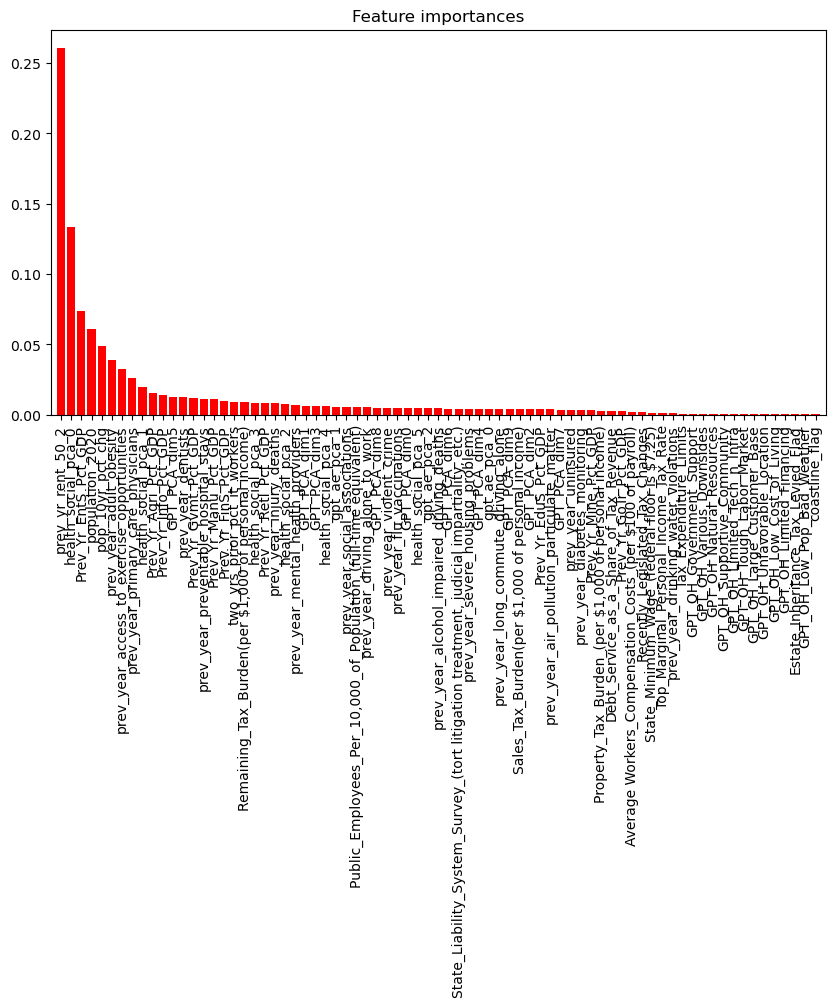

In [9]:
# feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

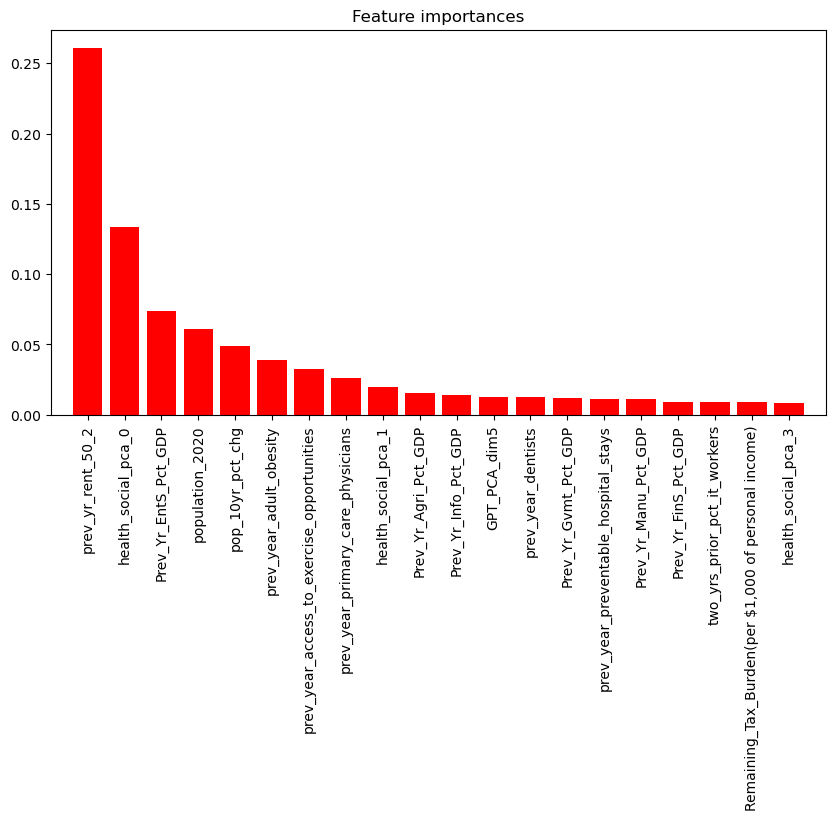

In [10]:
# feature importance but only for the top 20 features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(20), importances[indices][:20], color="r", align="center")
plt.xticks(range(20), X.columns[indices][:20], rotation=90)
plt.xlim([-1, 20])
plt.show()